In [1]:
from tensorflow.keras.datasets import mnist

In [14]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

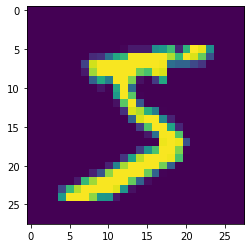

In [5]:
plt.imshow(X_train[0])


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
Y_train.shape

(60000,)

In [16]:
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [17]:
Y_train.shape

(60000, 10)

In [66]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,Flatten
model=Sequential()


In [67]:
model = Sequential()
#add model layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [68]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten_7 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                619530    
Total params: 712,202
Trainable params: 712,202
Non-trainable params: 0
_________________________________________________________________


In [69]:
X_train.shape[0]

60000

In [70]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)

In [71]:
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [74]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 231s 123ms/step - loss: 0.2952 - accuracy: 0.9607 - val_loss: 0.0591 - val_accuracy: 0.9803
Epoch 2/3
1875/1875 [==============================] - 225s 120ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0681 - val_accuracy: 0.9809
Epoch 3/3
1875/1875 [==============================] - 225s 120ms/step - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.0758 - val_accuracy: 0.9781


In [73]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

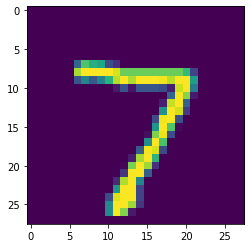

In [82]:
plt.imshow(X_test[0])
plt.show()

In [86]:
import numpy as np

In [87]:
np.argmax(model.predict(X_test[:1]))

7